# A Quick Start to Use the Package `repytah`

This notebook demonstrates how to use `repytah` to create aligned hierarchies for a music-based data stream. Before diving into the details, we’ll walk through a brief example program.

The example input is a csv file containing Chroma feature vectors for each beat of Chopin's Mazurka Op.30, No.1.

In [1]:
# Standard imports
import scipy.io as sio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import the package repytah
from repytah import *

# Make the images clear
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


### To skip visualizing the middle steps and get the output directly, try the following code:

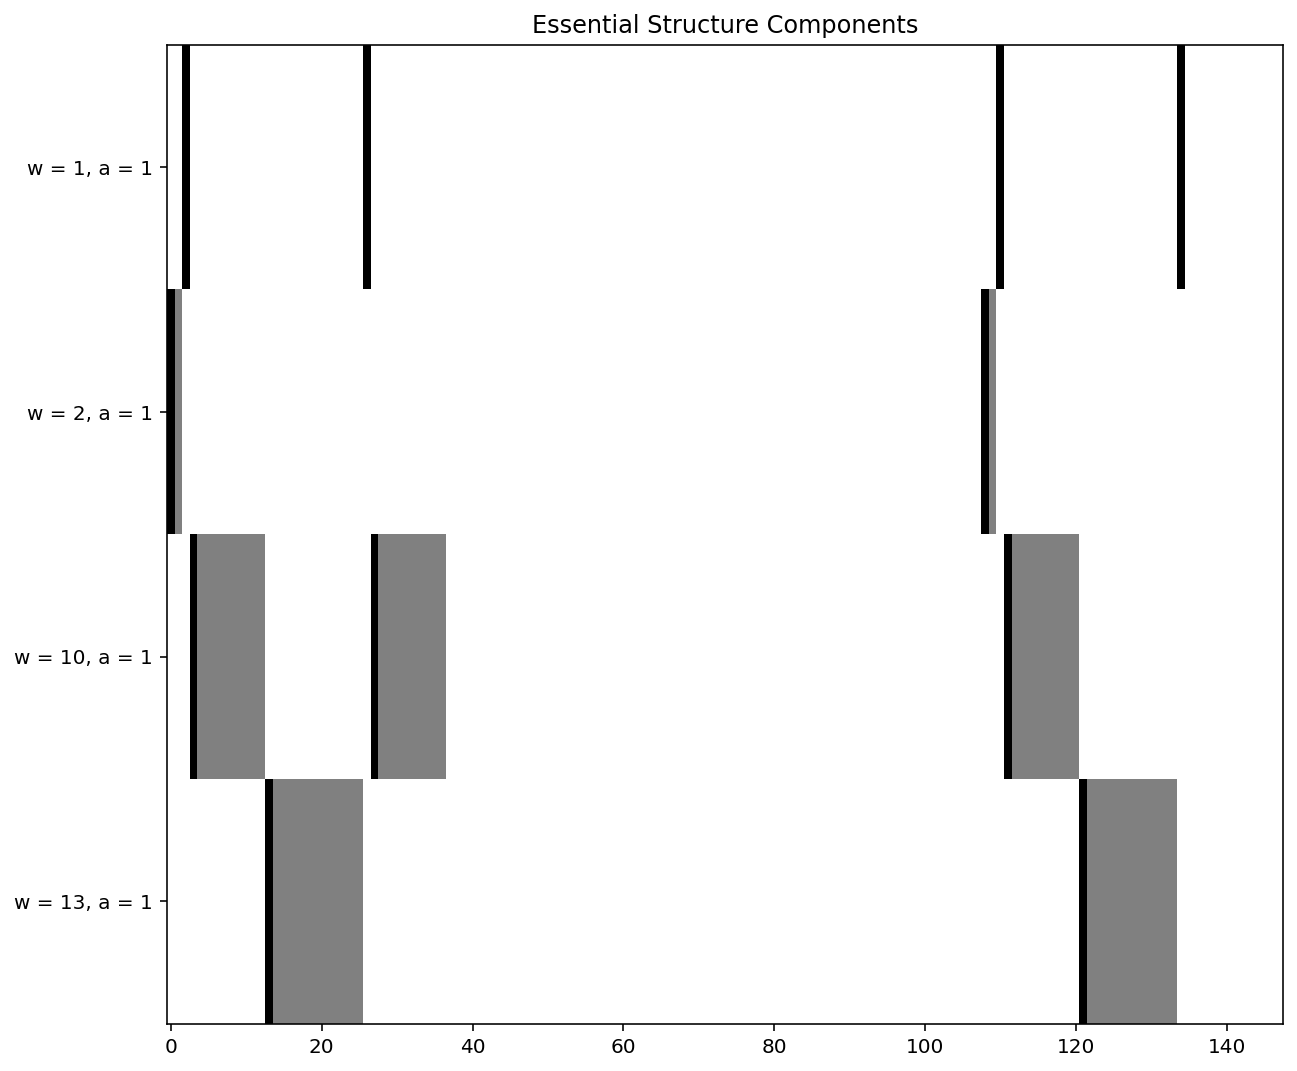

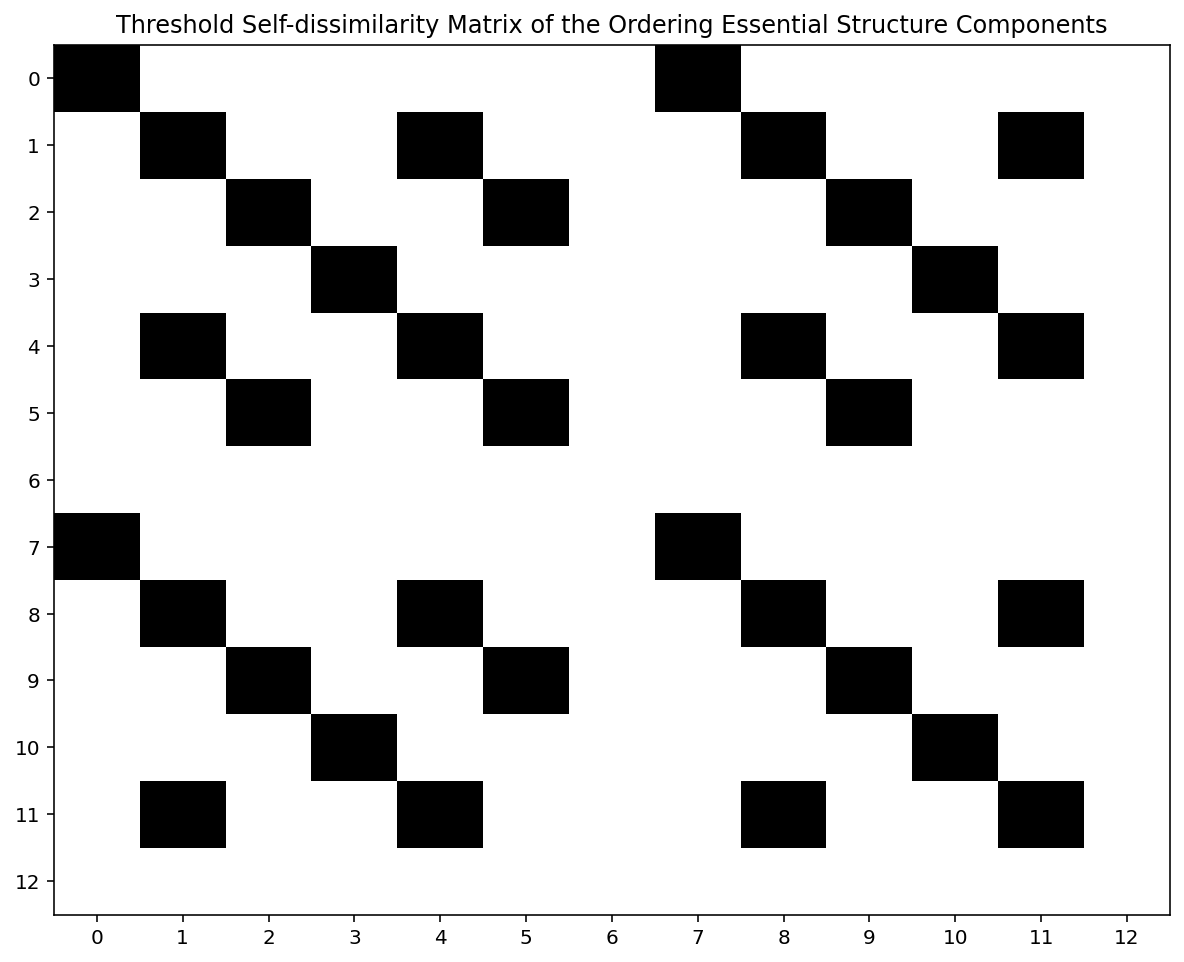

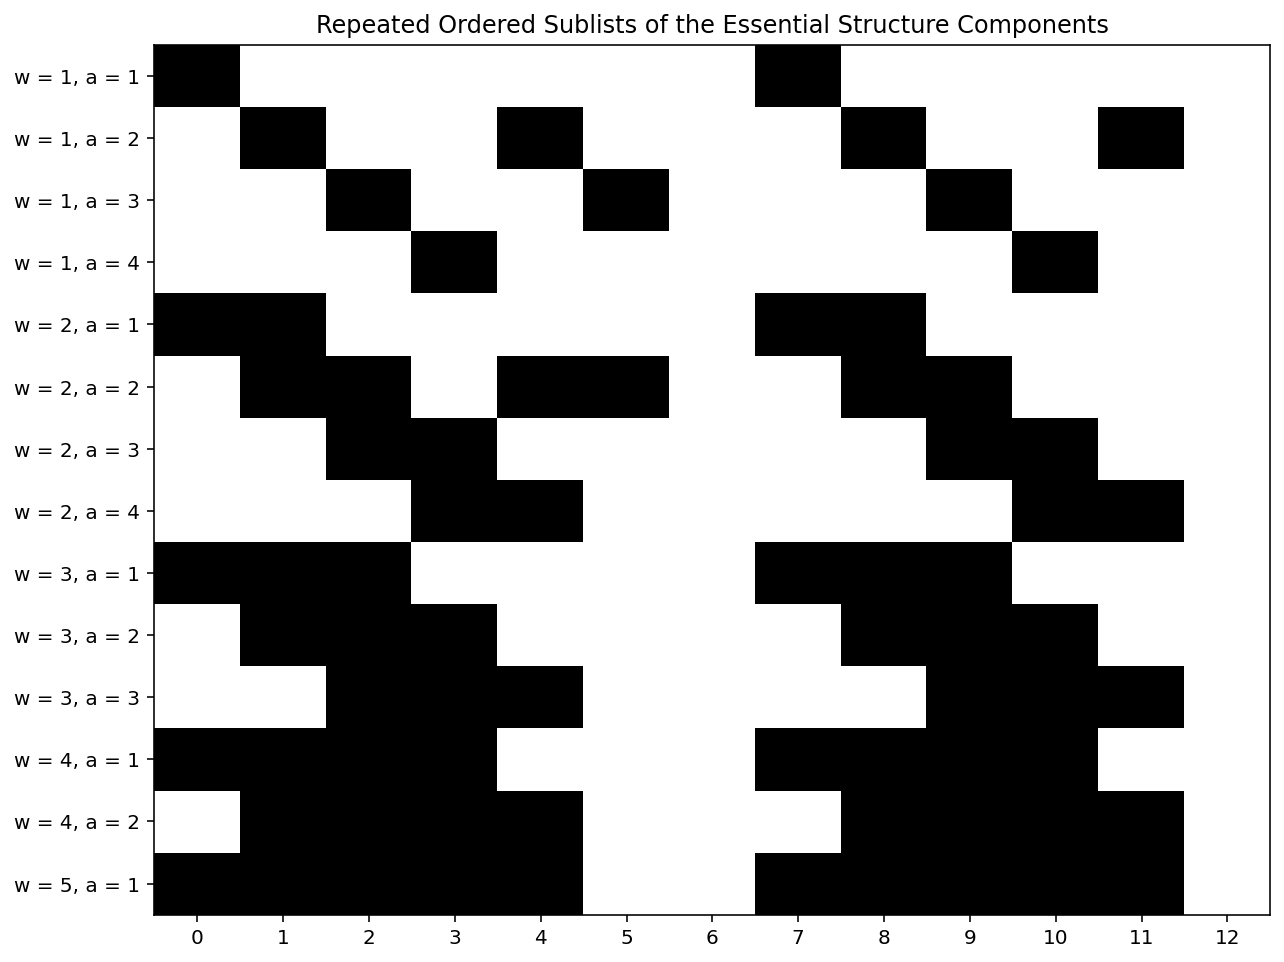

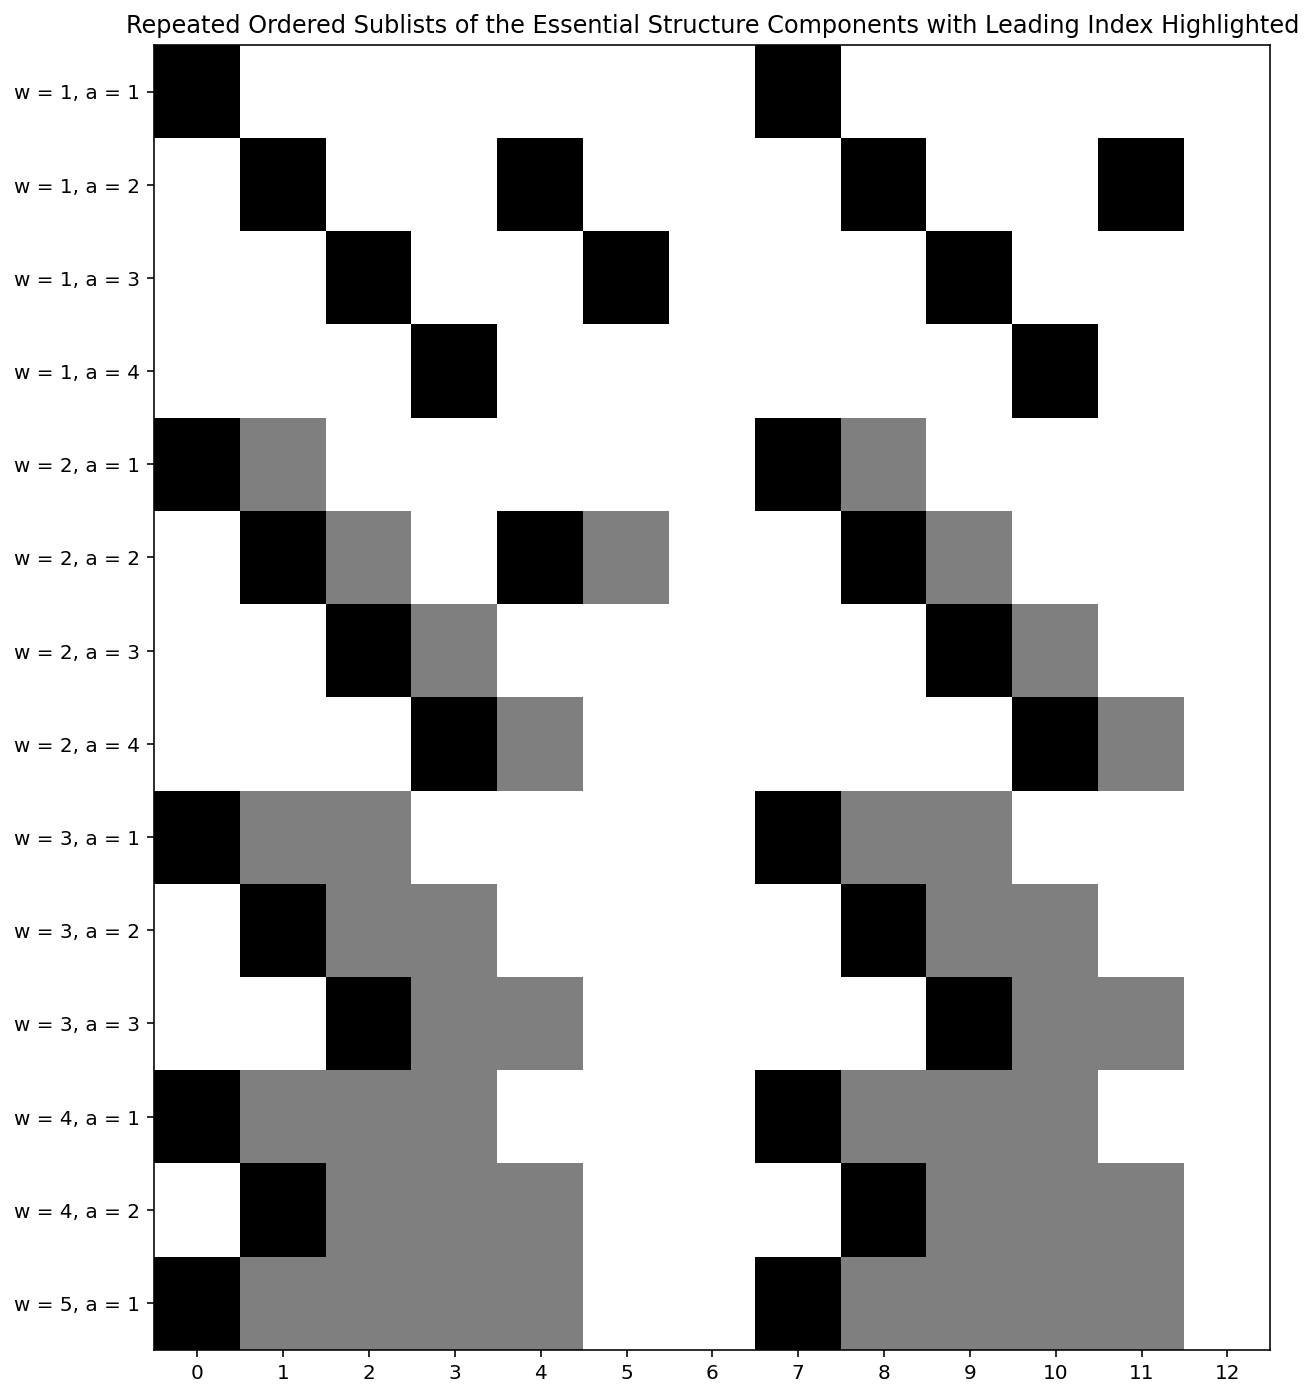

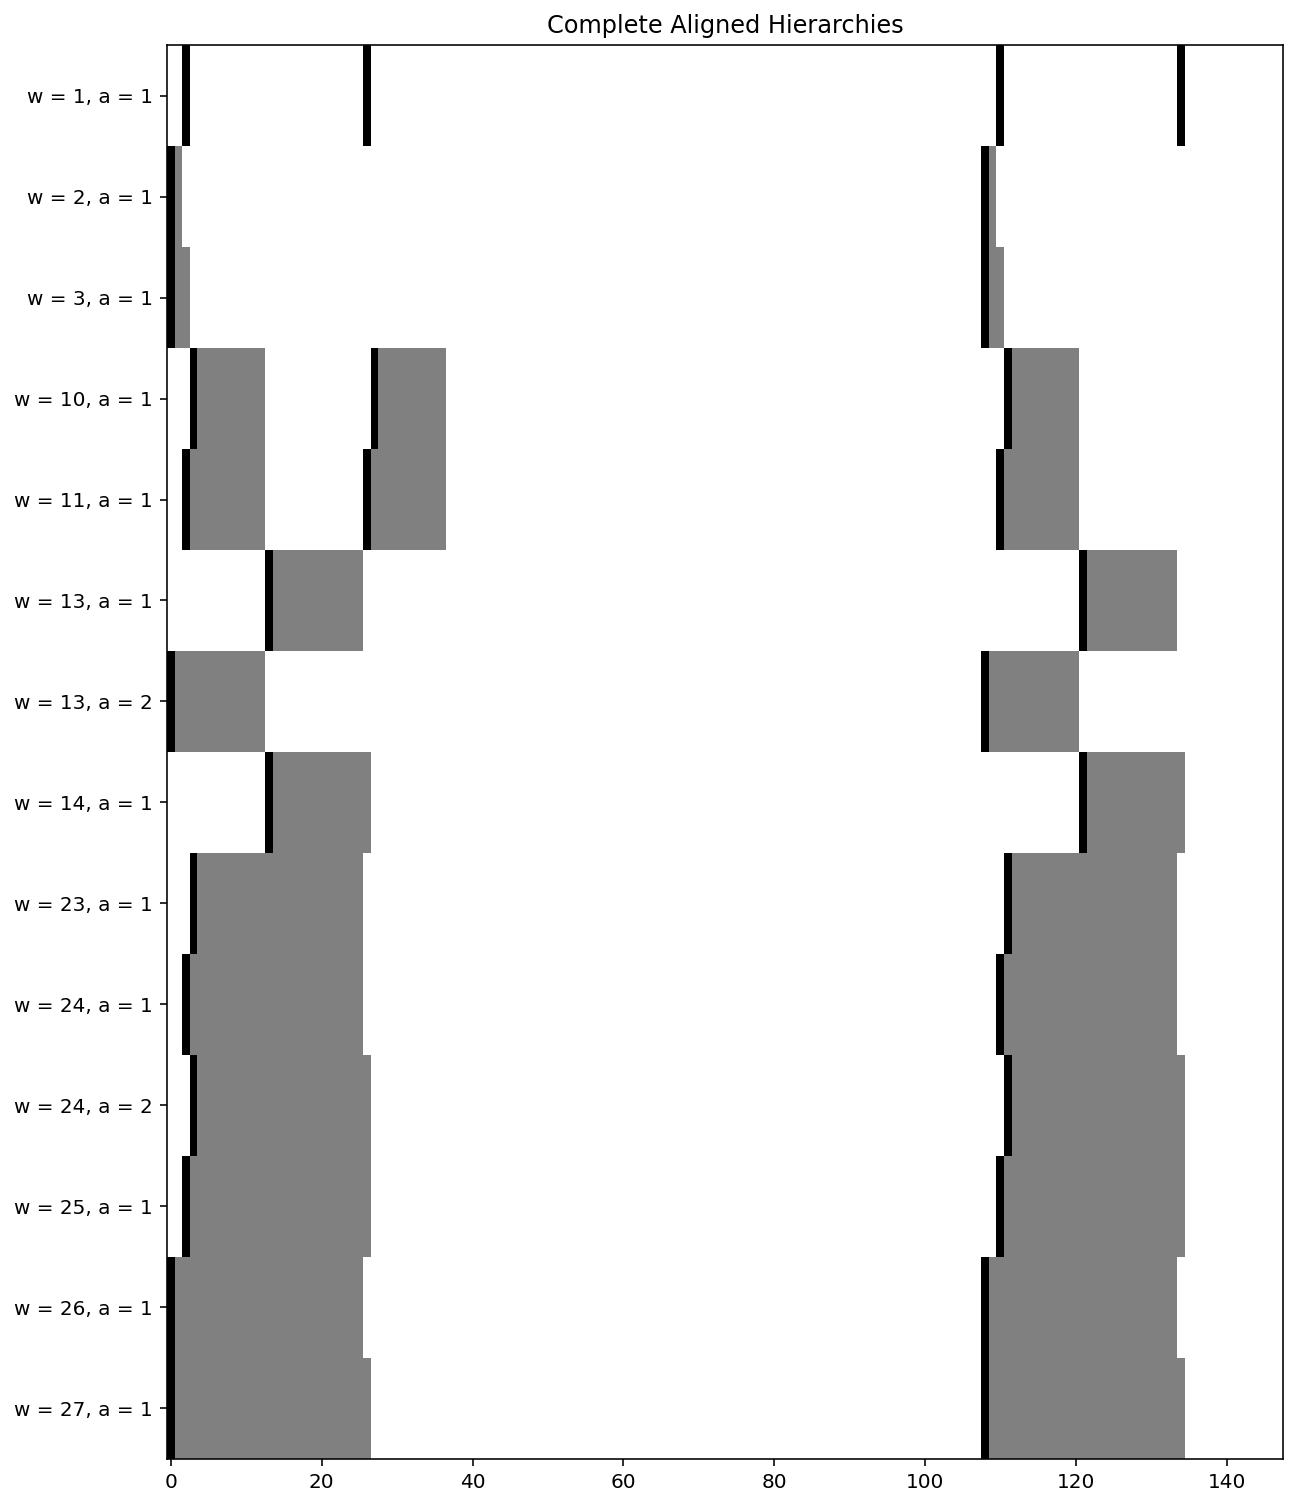

In [2]:
file_in = load_ex_data('../repytah/data/mazurka30-1.csv').to_numpy()
file_out = "hierarchical_out_file.mat"
num_fv_per_shingle = 12
thresh = 0.02
csv_to_aligned_hierarchies(file_in, file_out, num_fv_per_shingle, thresh, True)

### To visualize the middle steps, try the following code:

Load the input file and modify the music based data to a matrix representation:

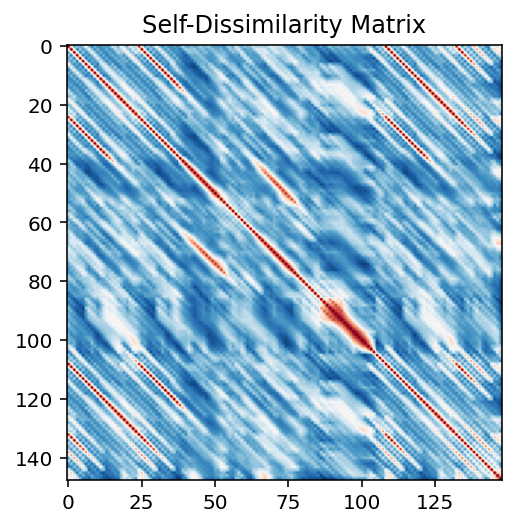

In [4]:
# Load the input file
file_in = load_ex_data('../repytah/data/mazurka30-1.csv').to_numpy()
fv_mat = file_in

# Number of feature vectors per shingle
num_fv_per_shingle = 12

# Create the self-dissimilarity matrix
self_dissim_mat = create_sdm(fv_mat, num_fv_per_shingle)

# Produce a visualization
SDM = plt.imshow(self_dissim_mat, cmap="RdBu")
plt.title('Self-Dissimilarity Matrix')
plt.show()

Threshold the above matrix:

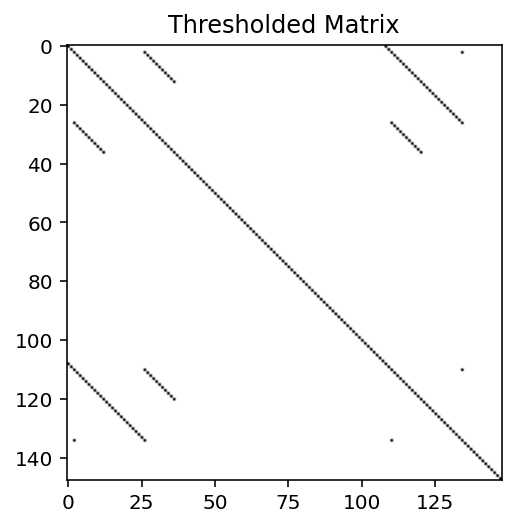

In [12]:
song_length = self_dissim_mat.shape[0]
thresh = 0.02

# Threshold the SDM to produce a binary matrix 
thresh_dist_mat = (self_dissim_mat <= thresh) 

# Produce a visualization
SDM = plt.imshow(thresh_dist_mat, cmap="Greys")
plt.title('Thresholded Matrix')
plt.show()

Find and group each pair of repeats:

In [13]:
all_lst = find_initial_repeats(thresh_dist_mat, np.arange(1, song_length + 1), 0)
complete_lst = find_complete_list(all_lst, song_length)
mat_no_overlaps, key_no_overlaps = remove_overlaps(complete_lst, song_length)[1:3]

Find the essential structure components of the song and build the aligned hierarchies:

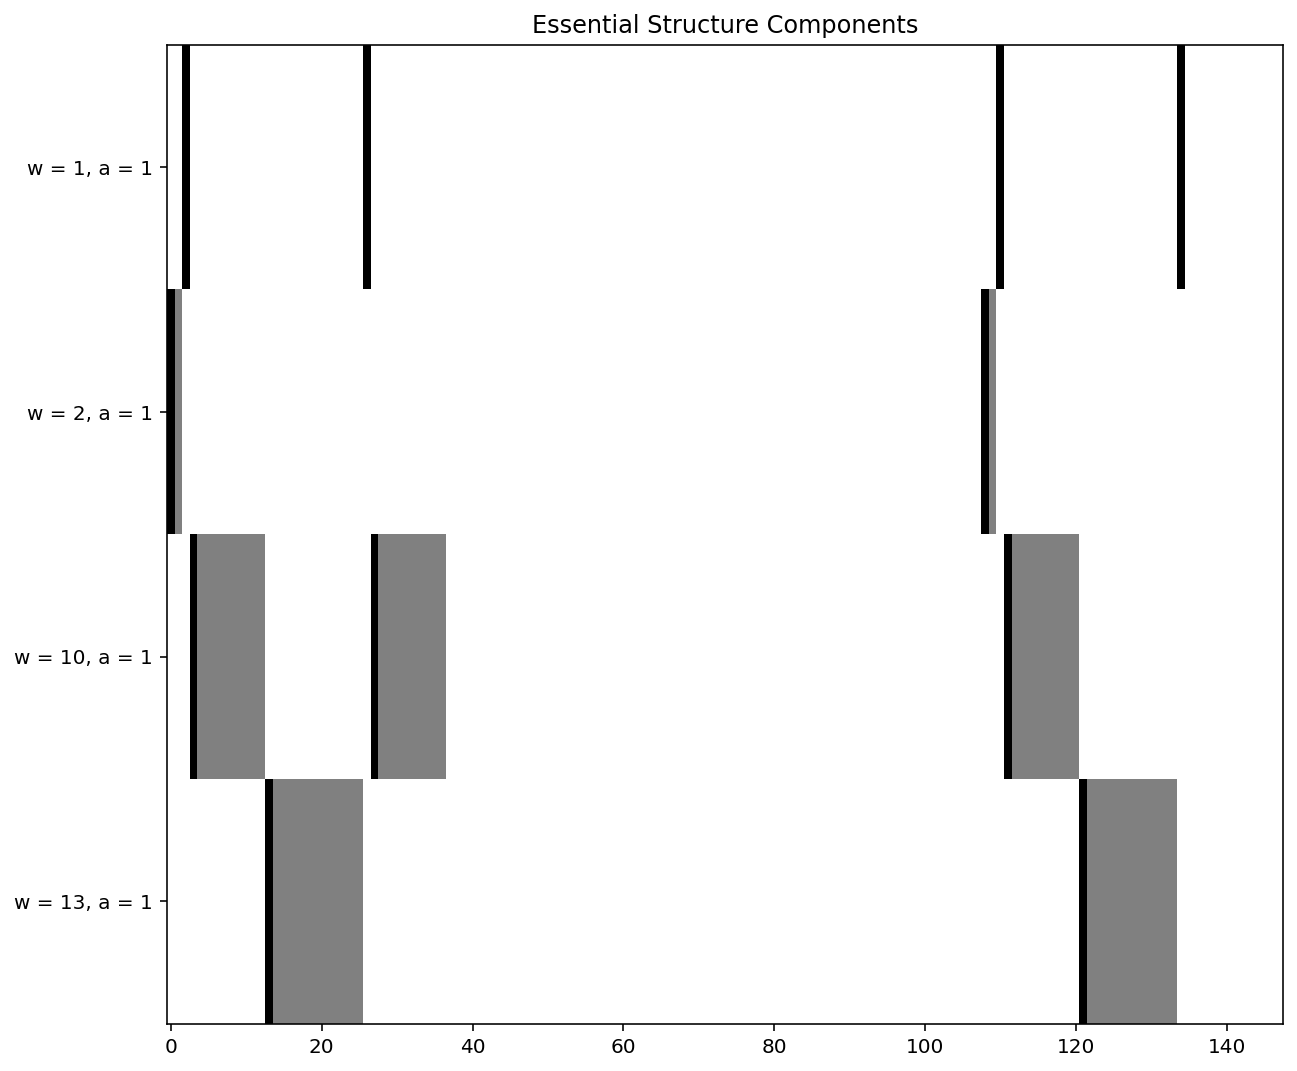

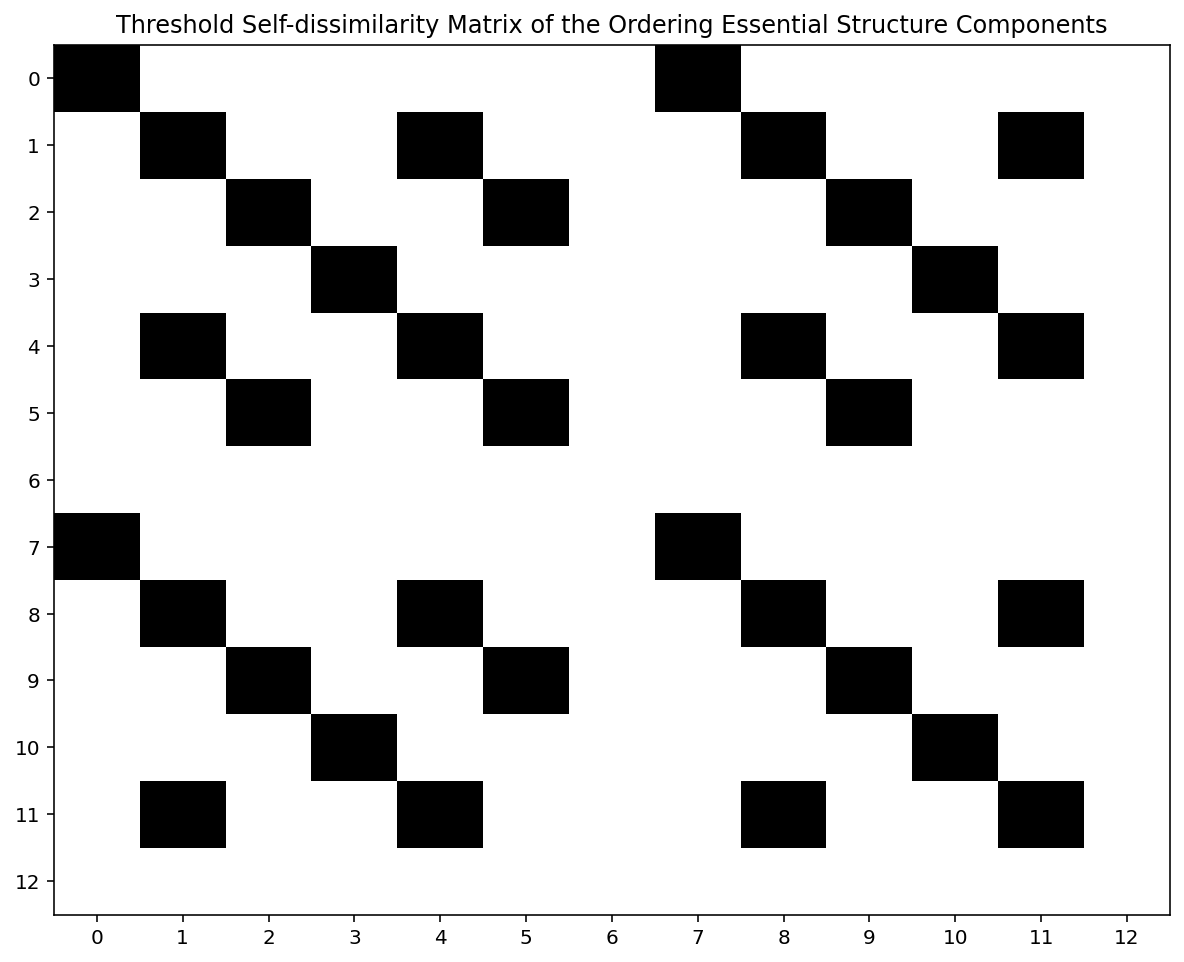

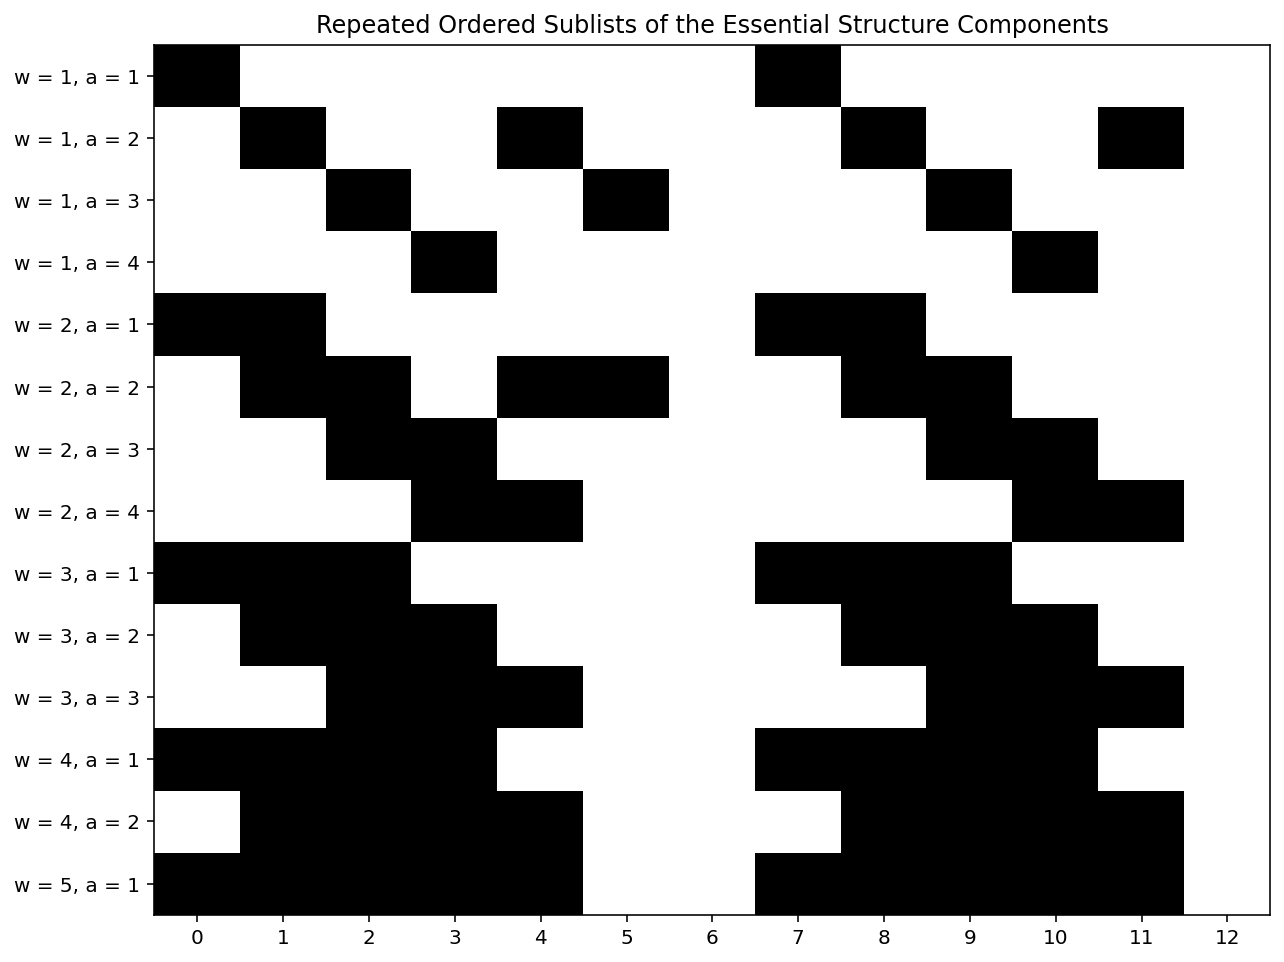

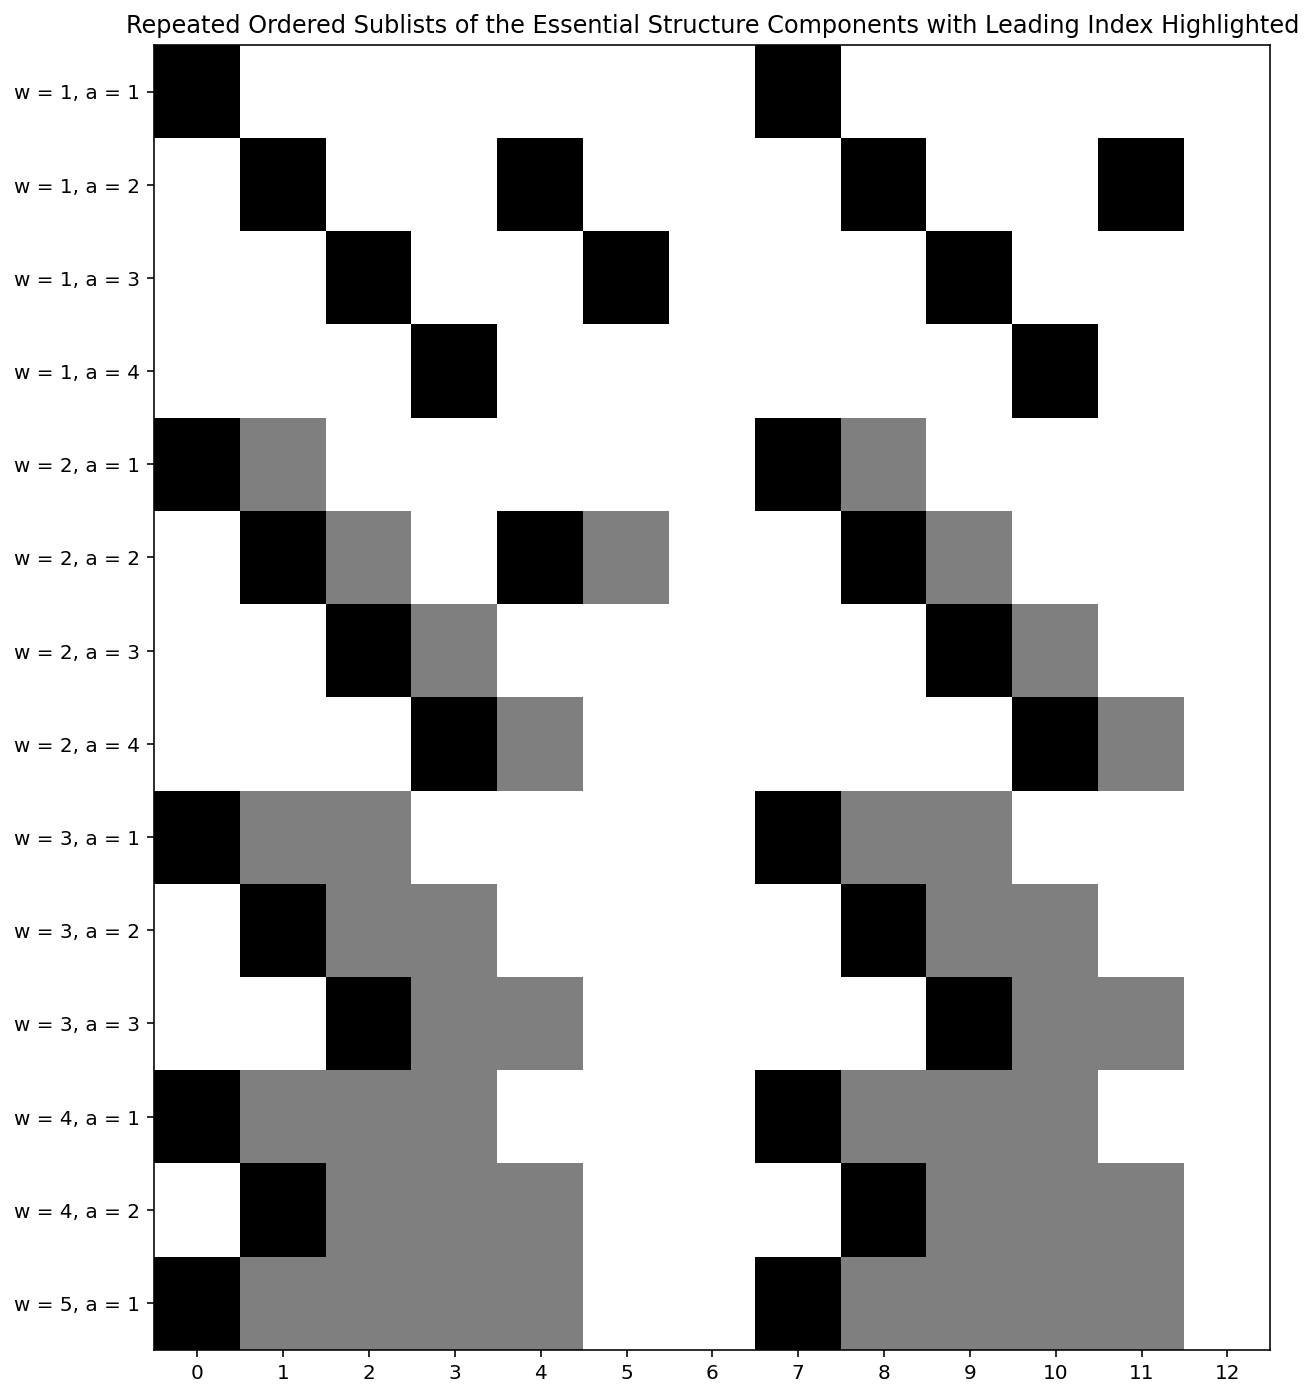

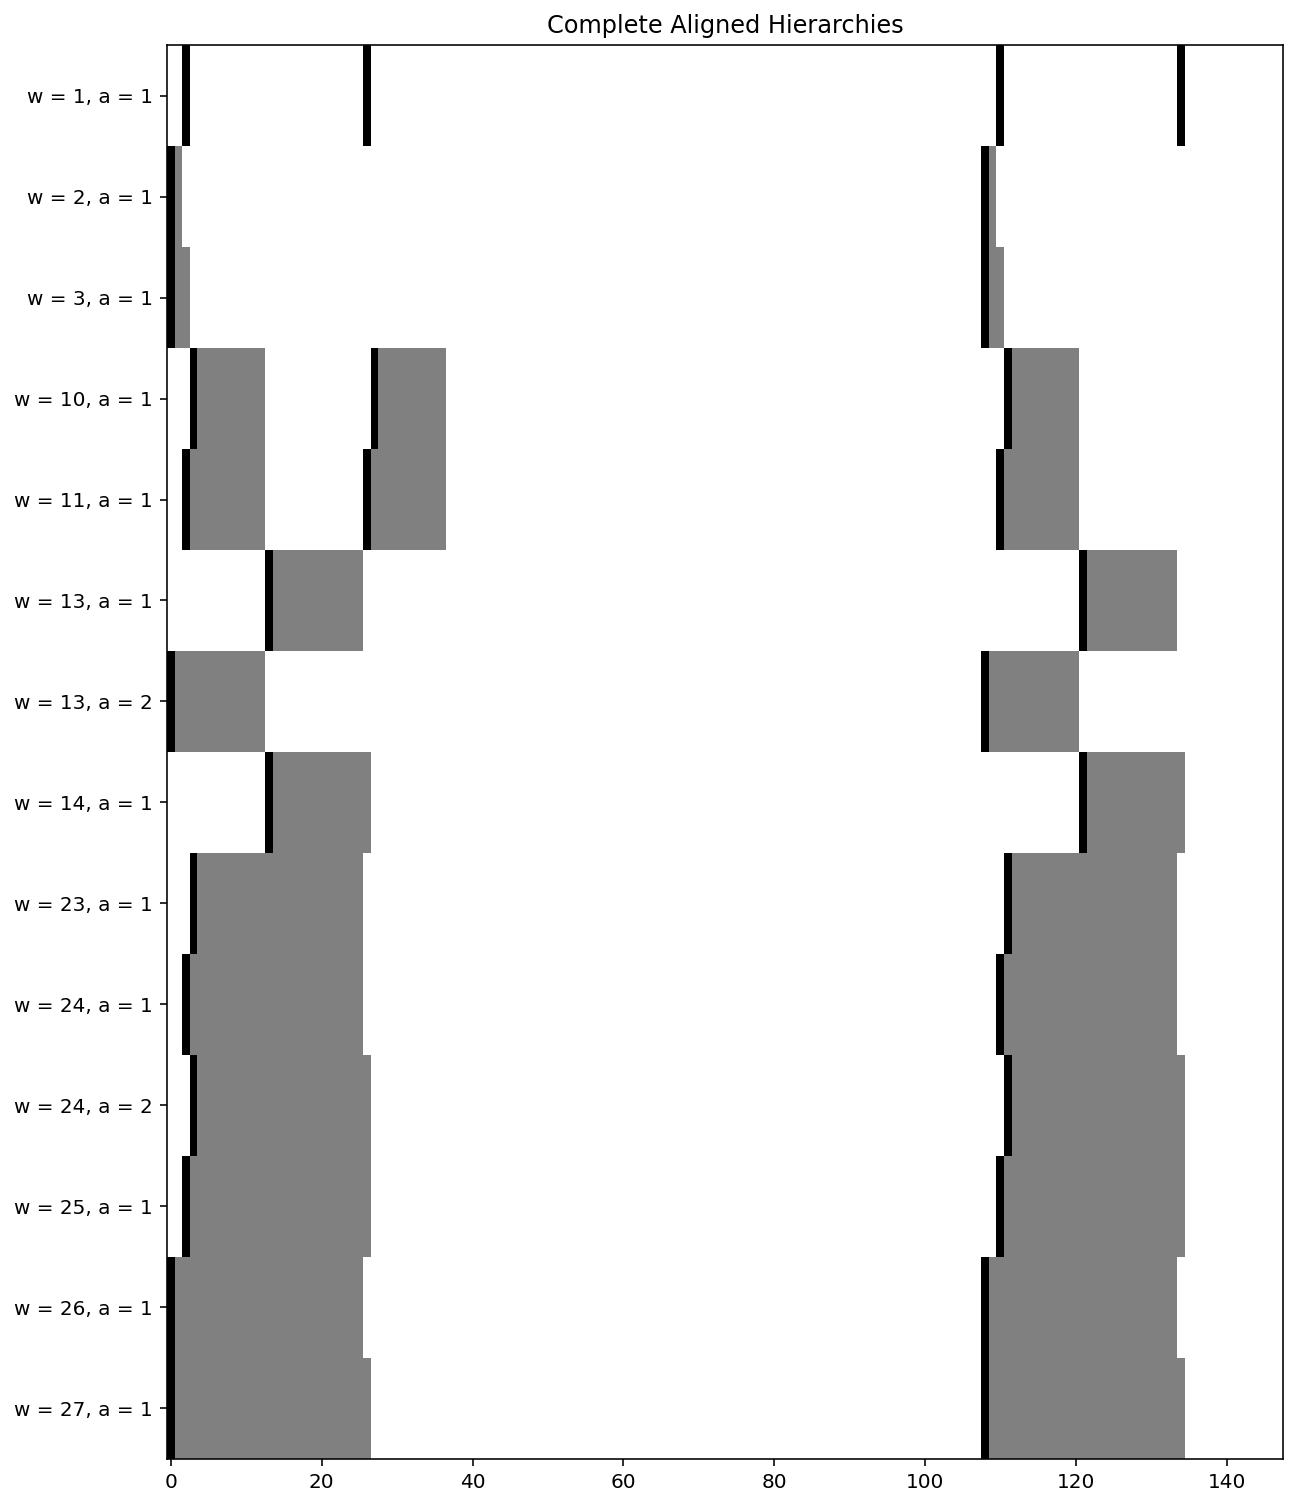

In [14]:
output_tuple = hierarchical_structure(mat_no_overlaps, key_no_overlaps, song_length, vis=True)

To visualize the repeated structures in the actual music score, the examples in color yellow and purple are shown:
<img src="pictures/score.jpg" width="700">
<img src="pictures/score1.jpg" width="700">
<img src="pictures/score2.jpg" width="700">

This notebook is just a quick walk-through that demonstrates how to use the package `repytah`, more technical details are in the [`example`](https://github.com/smith-tinkerlab/repytah/blob/main/docs/example_vignette.ipynb) notebook.